In [1]:
import tensorflow as tf
import numpy as np

# 14장 텐서플로의 구조 자세히 알아보기

## 14.1 텐서플로의 주요 특징

* 여러 개의 GPU를 사용할 수 있음
* 구글의 지원 및 오픈소스 개발자들의 활약으로 매우 빠르게 개발되고 있음
* 모바일 환경을 지원함

## 14.2 텐서플로의 랭크와 텐서

### 14.2.1 텐서의 랭크와 크기를 확인하는 방법

In [2]:
## t1, t2, t3 텐서 정의
t1 = tf.constant(np.pi)
t2 = tf.constant([1,2,3,4])
t3 = tf.constant([[1,2], [3,4]])

## 랭크를 구합니다
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

## 크기를 구합니다
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()


In [3]:
print('크기:', s1, s2, s3)
print('랭크:', r1.numpy(), r2.numpy(), r3.numpy())

크기: () (4,) (2, 2)
랭크: 0 1 2


## 14.3 텐서를 다차원 배열로 변환

In [4]:
arr = np.array([
    [1.,2.,3.,3.5],
    [4.,5.,6.,6.5],
    [7.,8.,9.,9.5]
])

T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1. shape)

T2 = tf.Variable(np.random.normal(size=5))
print(T2)

T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)
<tf.Variable 'Variable:0' shape=(5,) dtype=float64, numpy=array([0.14307949, 0.32501997, 0.28408556, 0.9739248 , 0.05322271])>
<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 0.61173139, -0.14154242, -0.94785131])>


In [5]:
## 텐서플로의 랭크를 변환
## 텐서 T1 을 랭크3인 T4와 T5로 변환한다

T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)

T5 = tf.reshape(T1, shape=[1, 3, -1])
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


In [6]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)

T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


In [7]:
# 텐서를 작은 텐서리스트로 나눌 수 있음

t5_splt = tf.split(T5, num_or_size_splits=2, axis=2)

# 출력 결과는 하나의 텐서가 아닌 텐서의 리스트임
print(t5_splt)

[<tf.Tensor: id=34, shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: id=35, shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


In [8]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)

print(t1)
print(t2)

t3 = tf.concat([t1, t2], axis=0)
print(t3)

t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 14.4 텐서플로의 계산 그래프 이해



In [9]:
a = tf.constant(1)
b = tf.constant(2)
c = tf.constant(3)

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


텐서플로 2 버전에서는 tf.function 데코레이터를 사용하여 일반 파이썬 함수를 호출 가능한 그래프 객체로 만듭니다.

In [10]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2)
    c = tf.constant(3)

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [11]:
print(simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


In [12]:
# simple_func가 만든 그래프에 있는 연산과 그래프 정의 확인

con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [13]:
## 그래프 정의 얻기 as_graph_def()
con_func.graph.as_graph_def()

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "Const_2"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32

## 14.5 텐서플로의 변수

텐서플로 변수 정의하는 방법  
tf.Variable(initial-value, name=optional-name)

텐서플로2 에서는 텐서플로 변수가 파이썬 객체 자체이므로 훨씬 다루기 쉽습니다.

In [14]:
w2 = tf.Variable(np.array([
    [1,2,3,4],
    [5,6,7,8]
]), name='w2')

print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int32, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


In [15]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int32)


In [16]:
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]


In [17]:
w2.assign(w2 + 1)
print(w2.numpy())

[[ 3  4  5  6]
 [ 7  8  9 10]]


In [18]:
# w2 변수를 다시 출력해보면 numpy 속성이 바뀐 것을 볼 수 있습니다.
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int32, numpy=
array([[ 3,  4,  5,  6],
       [ 7,  8,  9, 10]])>


## 14.6 tf.keras API 자세히 배우기

이 장에서는 텐서플로2 의 핵심 API인 tf.keras를 자세히 다루어 보겟습니다.

### 14.6.1 Sequential 모델

Sequential 모델은 층을 순서대로 쌓은 모델을 만듭니다.  
여기선 간단한 회귀분석 모델인 y = wx + b 인 선형 회귀 모델을 구현해 봅시다.

In [19]:
import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    
    return x, 1.726*x -0.84 + np.array(y)

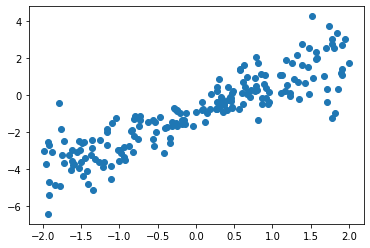

In [20]:
x, y = make_random_data()
plt.plot(x, y, 'o')
plt.show()

In [21]:
## 데이터 생성

x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [22]:
## 모델 생성

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [23]:
## 모델 네트워크 구조 확인 summary()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

/500
105/105 [==============================] - 0s 161us/sample - loss: 0.7566 - val_loss: 0.9110
Epoch 315/500
105/105 [==============================] - 0s 171us/sample - loss: 0.7567 - val_loss: 0.9090
Epoch 316/500
105/105 [==============================] - 0s 142us/sample - loss: 0.7561 - val_loss: 0.9092
Epoch 317/500
105/105 [==============================] - 0s 142us/sample - loss: 0.7563 - val_loss: 0.9080
Epoch 318/500
105/105 [==============================] - 0s 152us/sample - loss: 0.7562 - val_loss: 0.9068
Epoch 319/500
105/105 [==============================] - 0s 142us/sample - loss: 0.7559 - val_loss: 0.9049
Epoch 320/500
105/105 [==============================] - 0s 142us/sample - loss: 0.7567 - val_loss: 0.9025
Epoch 321/500
105/105 [==============================] - 0s 133us/sample - loss: 0.7559 - val_loss: 0.9014
Epoch 322/500
105/105 [==============================] - 0s 133us/sample - loss: 0.7556 - val_loss: 0.9004
Epoch 323/500
105/105 [=======================

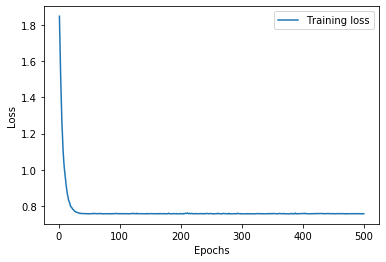

In [25]:
## fit() 메서드에서 반환 받은 History 객체의 history 딕셔너리에는 에포크마다 계산한 손실 함수 값이 저장되어 있습니다.
## 훈련 세트에 대한 손실 함수 값은 'loss' 키에 담겨 있습니다. 이 값을 그래프로 그려봅시다.

epochs = np.arange(1, 500+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 14.6.2 함수형 API

앞에서 구현한 회귀 모델을 함수형 API를 통해 구현해 봅시다.  
tf.keras의 함수형 API는 다양한 토폴로지의 네트워크를 만들 수 있습니다.  

In [26]:
from tensorflow.keras import Model, Input

input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

In [27]:
dense = tf.keras.layers.Dense(1)
output = dense(input)

In [28]:
model = tf.keras.Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, validation_split=0.3)

/500
105/105 [==============================] - 0s 190us/sample - loss: 0.7560 - val_loss: 0.9095
Epoch 315/500
105/105 [==============================] - 0s 161us/sample - loss: 0.7571 - val_loss: 0.9087
Epoch 316/500
105/105 [==============================] - 0s 171us/sample - loss: 0.7557 - val_loss: 0.9061
Epoch 317/500
105/105 [==============================] - 0s 190us/sample - loss: 0.7561 - val_loss: 0.9072
Epoch 318/500
105/105 [==============================] - 0s 199us/sample - loss: 0.7557 - val_loss: 0.9083
Epoch 319/500
105/105 [==============================] - 0s 171us/sample - loss: 0.7573 - val_loss: 0.9134
Epoch 320/500
105/105 [==============================] - 0s 161us/sample - loss: 0.7566 - val_loss: 0.9183
Epoch 321/500
105/105 [==============================] - 0s 180us/sample - loss: 0.7575 - val_loss: 0.9188
Epoch 322/500
105/105 [==============================] - 0s 152us/sample - loss: 0.7576 - val_loss: 0.9208
Epoch 323/500
105/105 [=======================

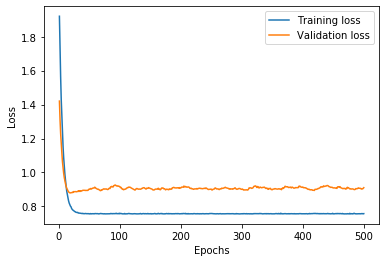

In [30]:
## 이번에는 훈련 손쇨과 함께 검증 세트에 대한 손실도 같이 그래프로 출력해 봅시다.

plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 14.6.3 tf.keras 모델의 저장과 복원

tf.keras API로 만든 모델을 저장하고 복원하는 것은 아주 쉽습니다.  
먼저 앞서 만든 모델 가중치를 save_weights() 메서드로 저장해 봅시다.

In [31]:
## save_weights() 함수는 파일 이름의 확장자가 h5 이면 자동으로 HDF5 포멧으로 저장합니다.

model.save_weights('simple_weights.h5')

In [32]:
## 저장된 가중치를 사용하려면 새로운 모델을 만들고 load_weights() 메서드로 가중치를 로드합니다.

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weights.h5')

In [33]:
model.evaluate(x_test, y_test)

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9465052485466003

In [34]:
## 가중치 되에 모델 전체를 저장하고 싶을 땐 tf.keras save() 메서드를 사용하여 가중치와 네트워크 구조까지 HDF5 포멧으로 저장할 수 있습니다.

model.save('simple_model_full.h5')
model=tf.keras.models.load_model('simple_model_full.h5')
model.evaluate(x_test, y_test)

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9465052485466003

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='py_model.h5', monitor='val_loss', save_best_only=True), tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=callback_list)

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s 4ms/sample - loss: 4.3043 - val_loss: 2.1995
Epoch 2/500
120/120 [==============================] - 0s 233us/sample - loss: 3.6476 - val_loss: 1.8939
Epoch 3/500
120/120 [==============================] - 0s 249us/sample - loss: 3.1344 - val_loss: 1.6496
Epoch 4/500
120/120 [==============================] - 0s 258us/sample - loss: 2.7147 - val_loss: 1.4548
Epoch 5/500
120/120 [==============================] - 0s 266us/sample - loss: 2.3703 - val_loss: 1.2989
Epoch 6/500
120/120 [==============================] - 0s 465us/sample - loss: 2.0920 - val_loss: 1.1786
Epoch 7/500
120/120 [==============================] - 0s 266us/sample - loss: 1.8636 - val_loss: 1.0809
Epoch 8/500
120/120 [==============================] - 0s 233us/sample - loss: 1.6718 - val_loss: 1.0021
Epoch 9/500
120/120 [==============================] - 0s 249us/sample - loss: 1.5117 - val_loss: 0.9421
Epoch 10/500

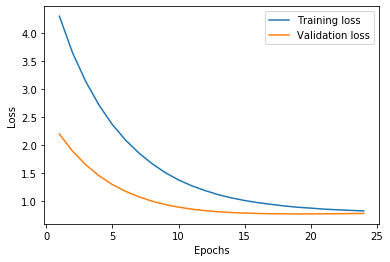

In [36]:
## 손실 그래프를 그려봅시다

epochs = np.arange(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('14_05.png', dpi=300)
plt.show()

In [37]:
model = tf.keras.models.load_model('simple_model_full.h5')
model.evaluate(x_test, y_test)

50/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.9465052485466003

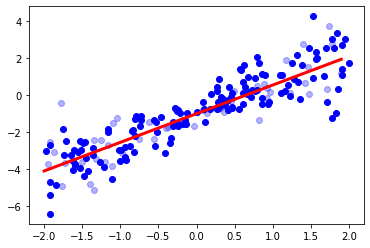

In [38]:
# 여기까지 학습한 선형 모델을 그래프로 그려봅시다.
# 짙은 색 원은 훈련 세트고 밝은색 원은 테스트 세트입니다.

x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()

## 14.7 계산 그래프 시각화(생략)

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1, kernel_regularizer='l2'))

from tensorflow.keras.callbacks import TensorBoard

callback_list = [TensorBoard()]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=500, callbacks=callback_list, validation_split=0.3)

- loss: 0.7812 - val_loss: 0.9370
Epoch 315/500
105/105 [==============================] - 0s 199us/sample - loss: 0.7804 - val_loss: 0.9397
Epoch 316/500
105/105 [==============================] - 0s 456us/sample - loss: 0.7803 - val_loss: 0.9397
Epoch 317/500
105/105 [==============================] - 0s 209us/sample - loss: 0.7805 - val_loss: 0.9397
Epoch 318/500
105/105 [==============================] - 0s 190us/sample - loss: 0.7802 - val_loss: 0.9399
Epoch 319/500
105/105 [==============================] - 0s 180us/sample - loss: 0.7798 - val_loss: 0.9407
Epoch 320/500
105/105 [==============================] - 0s 180us/sample - loss: 0.7811 - val_loss: 0.9374
Epoch 321/500
105/105 [==============================] - 0s 190us/sample - loss: 0.7805 - val_loss: 0.9384
Epoch 322/500
105/105 [==============================] - 0s 190us/sample - loss: 0.7794 - val_loss: 0.9395
Epoch 323/500
105/105 [==============================] - 0s 180us/sample - loss: 0.7802 - val_loss: 0.9403
Epo

### 14.7.2 케라스의 층 그래프 그리기

케라스는 층 그래프를 그릴 수 있는 plot_model() 함수를 제공합니다. 이 함수를 사용하려면 pydot 파이썬 패키지를 설치해야 합니다.

In [40]:
input = tf.keras.Input(shape=(784,))
hidden = tf.keras.layers.Dense(100)(input)
output = tf.keras.layers.Dense(10)(hidden)

model = tf.keras.Model(input, output)

In [41]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

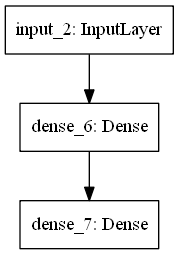

In [42]:
tf.keras.utils.plot_model(model, to_file='model_1.png')